In this Jupyter notebook, we conduct an exploratory analysis of bike share data provided by Capital One. 

In [2]:
# Importing appropriate libraries

import pandas as pd
import numpy as np
from numpy import median, mean

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

# Additional Libraries
import geopy.distance
import math
import operator
from collections import Counter

# Display full column widths to read schema descriptions
pd.options.display.max_colwidth = 200 

In [3]:
# Read in our data, convert to pandas dataframe 
df = pd.read_csv('./metro-bike-share-trip-data.csv', low_memory=False)
# Look at first 5 rows in our data to get a feel of what our data is like
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.0566101', 'needs_recoding': False}","{'longitude': '-118.23721', 'latitude': '34.0566101', 'needs_recoding': False}"
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.0566101', 'needs_recoding': False}","{'longitude': '-118.23721', 'latitude': '34.0566101', 'needs_recoding': False}"
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.0528984', 'needs_recoding': False}","{'longitude': '-118.24156', 'latitude': '34.0528984', 'needs_recoding': False}"
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.0528984', 'needs_recoding': False}","{'longitude': '-118.24156', 'latitude': '34.0528984', 'needs_recoding': False}"
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.0498886', 'needs_recoding': False}","{'longitude': '-118.25588', 'latitude': '34.0498886', 'needs_recoding': False}"


In [4]:
# Checking for null values (missing data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 16 columns):
Trip ID                       132427 non-null int64
Duration                      132427 non-null int64
Start Time                    132427 non-null object
End Time                      132427 non-null object
Starting Station ID           132408 non-null float64
Starting Station Latitude     132379 non-null float64
Starting Station Longitude    132379 non-null float64
Ending Station ID             132331 non-null float64
Ending Station Latitude       131376 non-null float64
Ending Station Longitude      131376 non-null float64
Bike ID                       132417 non-null float64
Plan Duration                 131661 non-null float64
Trip Route Category           132427 non-null object
Passholder Type               132427 non-null object
Starting Lat-Long             98622 non-null object
Ending Lat-Long               131376 non-null object
dtypes: float64(8), int64(2), object

From our output, we can see that there are variables with missing data. 

In [5]:
# Look at size of dataframe before dropping null values
df.shape

(132427, 16)

In [6]:
# Drop all rows with any null values/ missing data
df = df.dropna(how='any')

In [7]:
# Look at new size of dataframe
df.shape

(97825, 16)

From df.shape, we can see that the number of rows in our data has decreased, which is good. 

**Question 1 of Analysis:** Which start/stop stations are most popular? 

*I. Starting Station IDs*

In [8]:
# Take a look at all possible starting station ID's
set(df['Starting Station ID'])

{3005.0,
 3006.0,
 3007.0,
 3008.0,
 3010.0,
 3011.0,
 3014.0,
 3016.0,
 3018.0,
 3019.0,
 3020.0,
 3021.0,
 3022.0,
 3023.0,
 3024.0,
 3025.0,
 3026.0,
 3027.0,
 3028.0,
 3029.0,
 3030.0,
 3031.0,
 3032.0,
 3033.0,
 3034.0,
 3035.0,
 3036.0,
 3037.0,
 3038.0,
 3040.0,
 3042.0,
 3045.0,
 3046.0,
 3047.0,
 3048.0,
 3049.0,
 3051.0,
 3052.0,
 3053.0,
 3054.0,
 3055.0,
 3056.0,
 3057.0,
 3058.0,
 3059.0,
 3060.0,
 3062.0,
 3063.0,
 3064.0,
 3065.0,
 3066.0,
 3067.0,
 3068.0,
 3069.0,
 3074.0,
 3075.0,
 3076.0,
 3077.0,
 3078.0,
 3079.0,
 3080.0,
 3081.0,
 3082.0,
 4108.0}

In [9]:
# Get top 5 most popular start station IDs and frequencies
df['Starting Station ID'].value_counts().head()

3030.0    3787
3069.0    3715
3005.0    3609
3014.0    3504
3031.0    3450
Name: Starting Station ID, dtype: int64

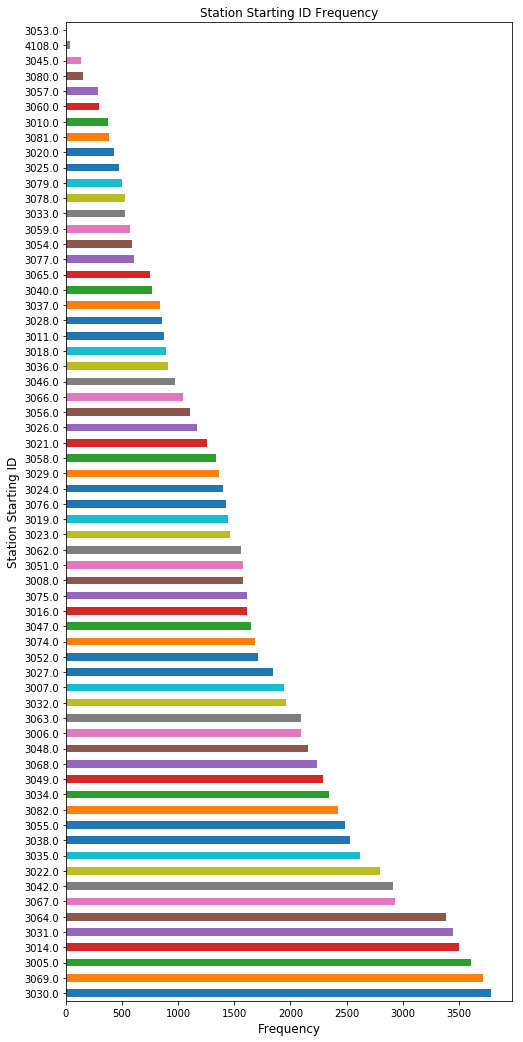

In [10]:
# Plot counts 
df['Starting Station ID'].value_counts().plot(kind='barh', figsize=[8,18])
plt.xlabel('Frequency', fontsize = 12)
plt.title('Station Starting ID Frequency')
plt.ylabel('Station Starting ID', fontsize = 12)
#plt.savefig('startStations.png')
plt.show()

The station with ID 3030 is our most popular starting station.

*II. Stopping Station IDs*

In [11]:
# Get top 5 most popular stop station IDs and frequencies
df['Ending Station ID'].value_counts().head()

3005.0    4621
3031.0    4175
3014.0    4091
3042.0    3862
3069.0    3622
Name: Ending Station ID, dtype: int64

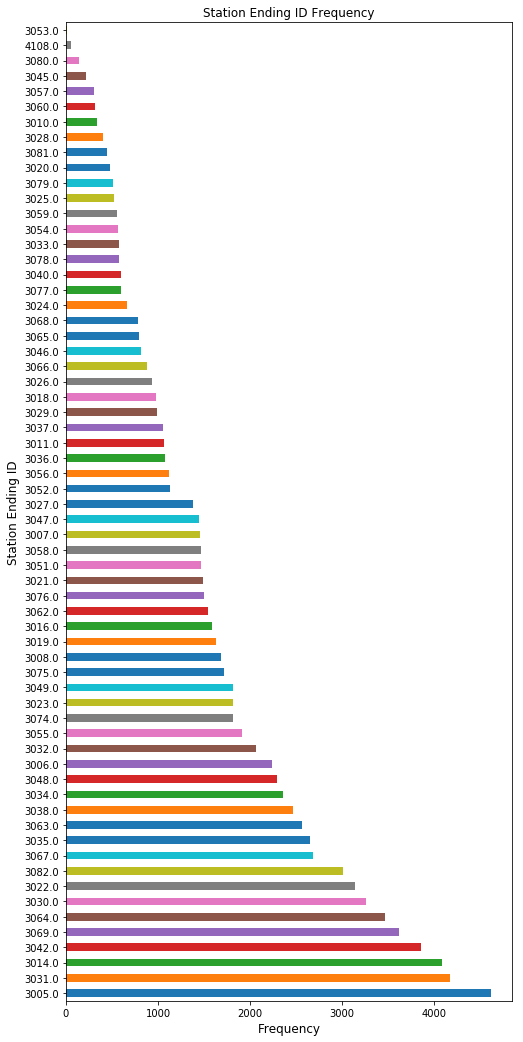

In [12]:
# Plot counts 
df['Ending Station ID'].value_counts().plot(kind='barh', figsize=[8,18])
plt.xlabel('Frequency', fontsize = 12)
plt.title('Station Ending ID Frequency')
plt.ylabel('Station Ending ID', fontsize = 12)
plt.savefig('endStations.png')
plt.show()

The station with ID 3005 is our most popular ending station. Our top five ending stations IDs are: 3005, 3031, 3014, 3042, and 3069. Stations 3005, 3031, 3014, and 3069 were also in the top five starting stations. Station 3042 was in the top ten starting stations. 

**Question 2 of Analysis:** What is the average distance travelled?

Since our data does not provide us the distance travelled for each trip, we need to calculate it. We can use the starting and ending latitudes/longitudes provided to find distance. First, let's check that the latitudes/longitudes are not stored as strings:

In [13]:
print(type(df['Starting Station Latitude'][0]))
print(type(df['Starting Station Longitude'][0]))
print(type(df['Ending Station Latitude'][0]))
print(type(df['Ending Station Longitude'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


Looks like we are good to go. We can use the geopy library to calculate distance between two coordinates. 

In [14]:
# function that returns distance between two coordinates 
def distance(row):
    coords_1 = (row['Starting Station Latitude'], row['Starting Station Longitude'])
    coords_2 = (row['Ending Station Latitude'], row['Ending Station Longitude'])
    return (geopy.distance.vincenty(coords_1, coords_2).km)


In [15]:
# calling distance function on each row
# creates a new column in dataframe "Distance Travelled"
df['Distance Travelled']= df.apply(lambda x: distance(x),axis=1)

In [16]:
# Summary statistics of distance travelled 
df['Distance Travelled'].describe()

count    97825.000000
mean         6.203252
std        254.424539
min          0.000000
25%          0.578510
50%          0.954576
75%          1.453511
max      12587.422867
Name: Distance Travelled, dtype: float64

Our average distance is 6.203 km. Additionally, we have a high standard error and a skewed distribution. We can display the distribution of distance travelled in the form of a box plot. Displayed below: 

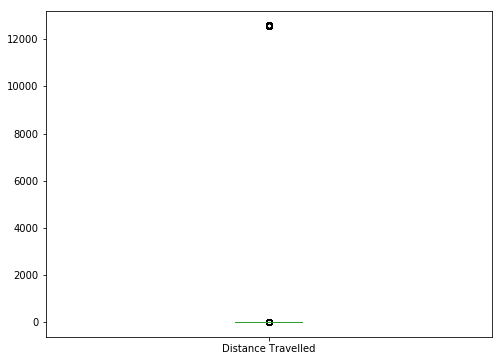

In [17]:
df['Distance Travelled'].plot.box(figsize=[8,6])

We see that most of our data is concentrated on the bottom, where distances travelled are not that far. We see some high outliers as well. 

**Question 3 of Analysis:** How many riders include bike sharing as a regular part of their commute?

Since we are not given User IDs, we will just estimate the number of riders that include bike sharing as a regular part of their commute using the type of passholder they have. 

There are three types of passholder types: Monthly Pass, Flex Pass, and Walk-up. We will define a rider that regularly uses bike sharing as a rider who holds a Flex Pass (plan duration of 365 days). 

In [18]:
# Displays counts of passholder types 
df['Passholder Type'].value_counts()

Monthly Pass    60093
Walk-up         30532
Flex Pass        7200
Name: Passholder Type, dtype: int64

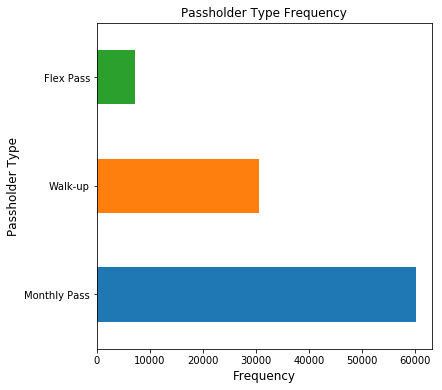

In [19]:
df['Passholder Type'].value_counts().plot(kind='barh', figsize=[6,6])
plt.xlabel('Frequency', fontsize = 12)
plt.title('Passholder Type Frequency')
plt.ylabel('Passholder Type', fontsize = 12)
plt.savefig('passholders.png')
plt.show()

From our output, we can put 7200 riders as the upper bound of riders who use bike share regularly for their commute. This serves as an upper bound because this is the number of *trips* that had Flex passes, which will be greater than the number of users. We will have 7200 users with a Flex pass only if each trip was with a unique user. 

**Additional Questions of Analysis:**

*I. How does ridership change with season?*


In [48]:
# Check our variable type so we know what we are looking at
# Returns object type before data is transformed
df['Start Time'].dtype

dtype('<M8[ns]')

In [29]:
# Convert to datetime for facility 
df['Start Time'] = pd.to_datetime(df['Start Time'], format = "%Y-%m-%dT%H:%M:%S")

In [49]:
# Create new column that classifies dates in their respective quarters
df['Start Time Quarter'] = df['Start Time'].dt.quarter

In [50]:
# Display quarters and their respective counts
df['Start Time Quarter'].value_counts()

3    55439
4    42386
Name: Start Time Quarter, dtype: int64

All data falls within the 3rd or 4th quarters. There seems to be a greater number of trips made in the third quarter. 

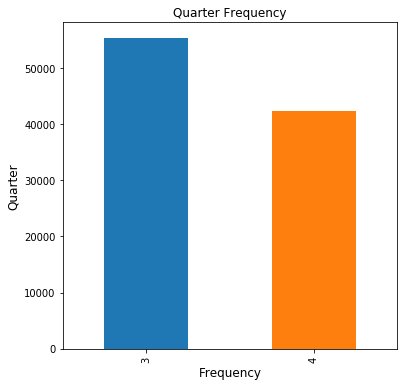

In [53]:
df['Start Time Quarter'].value_counts().plot(kind='bar', figsize=[6,6])
plt.xlabel('Frequency', fontsize = 12)
plt.title('Quarter Frequency')
plt.ylabel('Quarter', fontsize = 12)
plt.savefig('seasonQuarters.png')
plt.show()

Grouping by our quarters, we can gain further insights on our data by looking at different variables within seasons.

*i. Looking at Passholder Types:*

In [62]:
gb = df[['Start Time Quarter', 'Passholder Type', 'Trip ID']].groupby(by=['Start Time Quarter', 
                                                                     'Passholder Type']).count()
gb = gb.reset_index()
gb


,Start Time Quarter,Passholder Type,Trip ID
0,3,Flex Pass,4431
1,3,Monthly Pass,33216
2,3,Walk-up,17792
3,4,Flex Pass,2769
4,4,Monthly Pass,26877
5,4,Walk-up,12740


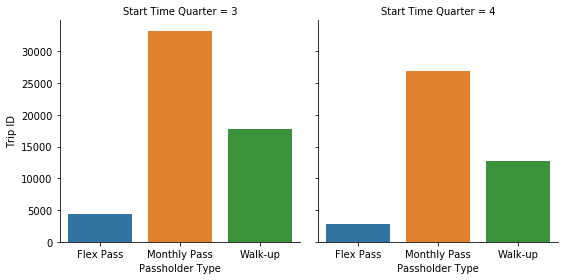

In [82]:
fg = sns.factorplot(x='Passholder Type', y='Trip ID',
                        col='Start Time Quarter', data=gb, kind='bar')
fg.savefig('seasonPasses.png')

In [70]:
ct = pd.crosstab(index=gb['Start Time Quarter'], columns= gb['Passholder Type'], values= gb['Trip ID'], aggfunc = 'sum')

In [75]:
ct

Passholder Type,Flex Pass,Monthly Pass,Walk-up
Start Time Quarter,,,
3,4431,33216,17792
4,2769,26877,12740


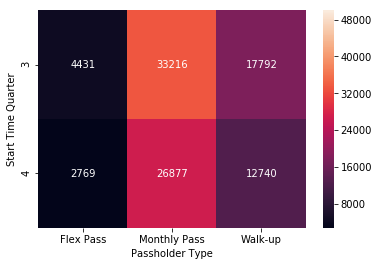

In [85]:
# Heatmap/ alternative visualization
ax = sns.heatmap(ct, annot=True, fmt="d", vmax=50000)
figure = ax.get_figure()    
figure.savefig('seasonPassesHeatmap.png', dpi=400)

In both quarters 3 and 4, the monthly pass was the most popular, walk up was the second most popular, and flex was the least popular. Overall, there was a lower frequency of each pass in the fourth quarter. This may be due to the winter weather, which can turn people away from biking outside.

*ii. Looking at Ride Durations:*

In [91]:
df.groupby(['Start Time Quarter']).mean()

,Trip ID,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Distance Travelled,Start Time Month
Start Time Quarter,,,,,,,,,,,,
3,5.261265e+06,1436.717473,3041.390303,34.028000,-118.181677,3041.062501,34.017761,-118.147208,6192.720522,47.147225,10.136393,3.0
4,1.262447e+07,1265.733025,3042.828340,34.047474,-118.250076,3042.186901,34.046962,-118.249810,6194.976879,42.867810,1.058880,4.0


In [101]:
df1 = df.groupby(['Start Time Quarter']).agg({'Duration': 'mean'}).reset_index()
print(df1)

   Start Time Quarter     Duration
0                   3  1436.717473
1                   4  1265.733025


In [102]:
df2 = df.groupby(['Start Time Quarter']).agg({'Duration':'sum'}).reset_index()
print(df2)

   Start Time Quarter  Duration
0                   3  79650180
1                   4  53649360


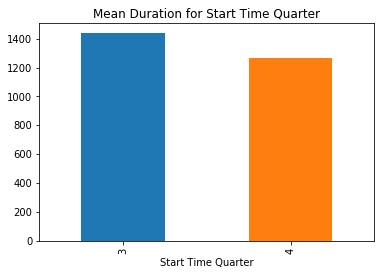

In [115]:
means = df1.plot.bar(x='Start Time Quarter', y='Duration', legend = False, title = 
                     'Mean Duration for Start Time Quarter')
figMeans = means.get_figure()    
figMeans.savefig('seasonDurationMeans.png', dpi=400)

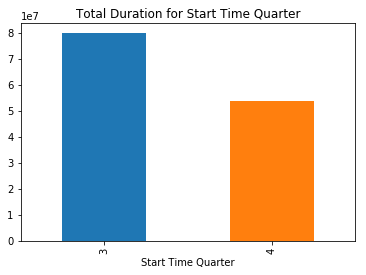

In [116]:
sum = df2.plot.bar(x='Start Time Quarter', y='Duration', legend = False, title = 
                     'Total Duration for Start Time Quarter')
figSum = means.get_figure()    
figSum.savefig('seasonDurationSums.png', dpi=400)

Both sums and means of duration is higher in quarter 3 than in quarter 4, indicating that people are biking less in quarter 4. Like in part *i. Looking at Passholder Types* , it may be possible that the winter months discourage people to bike. 

*II. What is the breakdown of Trip Route Category-Passholder type combinations? What might make a particular combination more popular?*

In [123]:
# lq = df.groupby(['Passholder Type', 'Trip Route Category', 'Trip ID']).size()

lq = df[['Passholder Type', 'Trip Route Category', 'Trip ID']].groupby(by=['Passholder Type', 
                                                                     'Trip Route Category']).count()
lq = lq.reset_index()
lq

,Passholder Type,Trip Route Category,Trip ID
0,Flex Pass,One Way,6833
1,Flex Pass,Round Trip,367
2,Monthly Pass,One Way,57192
3,Monthly Pass,Round Trip,2901
4,Walk-up,One Way,24241
5,Walk-up,Round Trip,6291


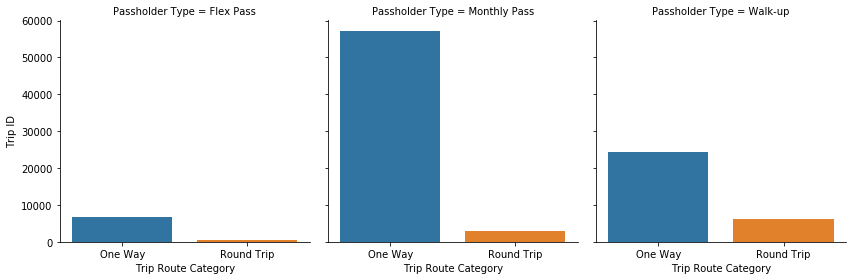

In [125]:
combosFig = sns.factorplot(x='Trip Route Category', y='Trip ID',
                        col='Passholder Type', data=lq, kind='bar')
combosFig.savefig('passTripCombos.png')